# Restaurant Revenue Prediction

In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from pylab import rcParams
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from collections import Counter

# Data Analysis

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# columns in training dataset
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [4]:
# shapes of datasets
print("Train :",train.shape)
print("Test:",test.shape)

Train : (137, 43)
Test: (100000, 42)


In [5]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
test['Open Date'] = pd.to_datetime(test['Open Date'])

In [6]:
# get columns with NULLs  (if exist)

train.columns[train.isna().any()].tolist()
test.columns[test.isna().any()].tolist()

[]

In [7]:
#Seperate categorical and numerical variables
numerical_features = train.select_dtypes([np.number]).columns.tolist()
categorical_features = train.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

In [8]:
categorical_features

['City', 'City Group', 'Type']

In [9]:
train[categorical_features].head()

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


In [10]:
train[numerical_features].head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [11]:
train[numerical_features].describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


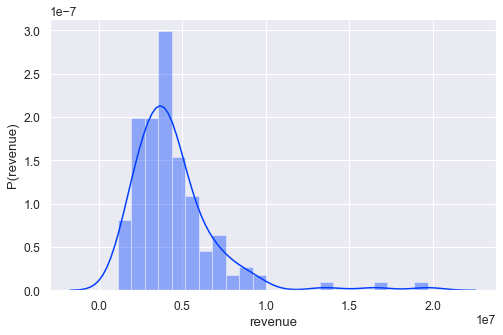

In [12]:
print(train['revenue'].describe())
sns.set(style='darkgrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train['revenue'], norm_hist=False, kde=True
).set(xlabel='revenue', ylabel='P(revenue)');

Note: some values are extremely out of order, may influence the machine learning rate badly. Let's kick them:)

In [13]:
train[train['revenue'] > 10000000 ]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,2000-01-07,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
75,75,2005-10-15,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,1999-12-18,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0


In [14]:
train = train[train['revenue'] < 10000000 ]
train.reset_index(drop=True).head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


Frequency graph for numerical variables:

count    1.340000e+02
mean     4.181438e+06
std      1.799596e+06
min      1.149870e+06
25%      2.994569e+06
50%      3.887614e+06
75%      5.001114e+06
max      9.652350e+06
Name: revenue, dtype: float64


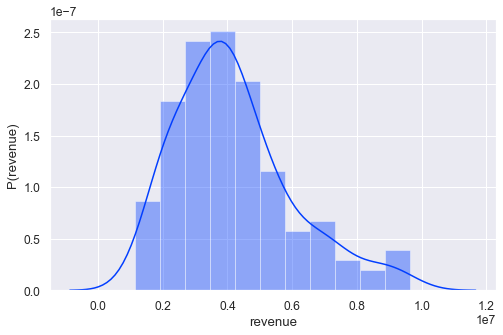

In [15]:
print(train['revenue'].describe())
sns.set(style='darkgrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train['revenue'], norm_hist=False, kde=True
).set(xlabel='revenue', ylabel='P(revenue)');

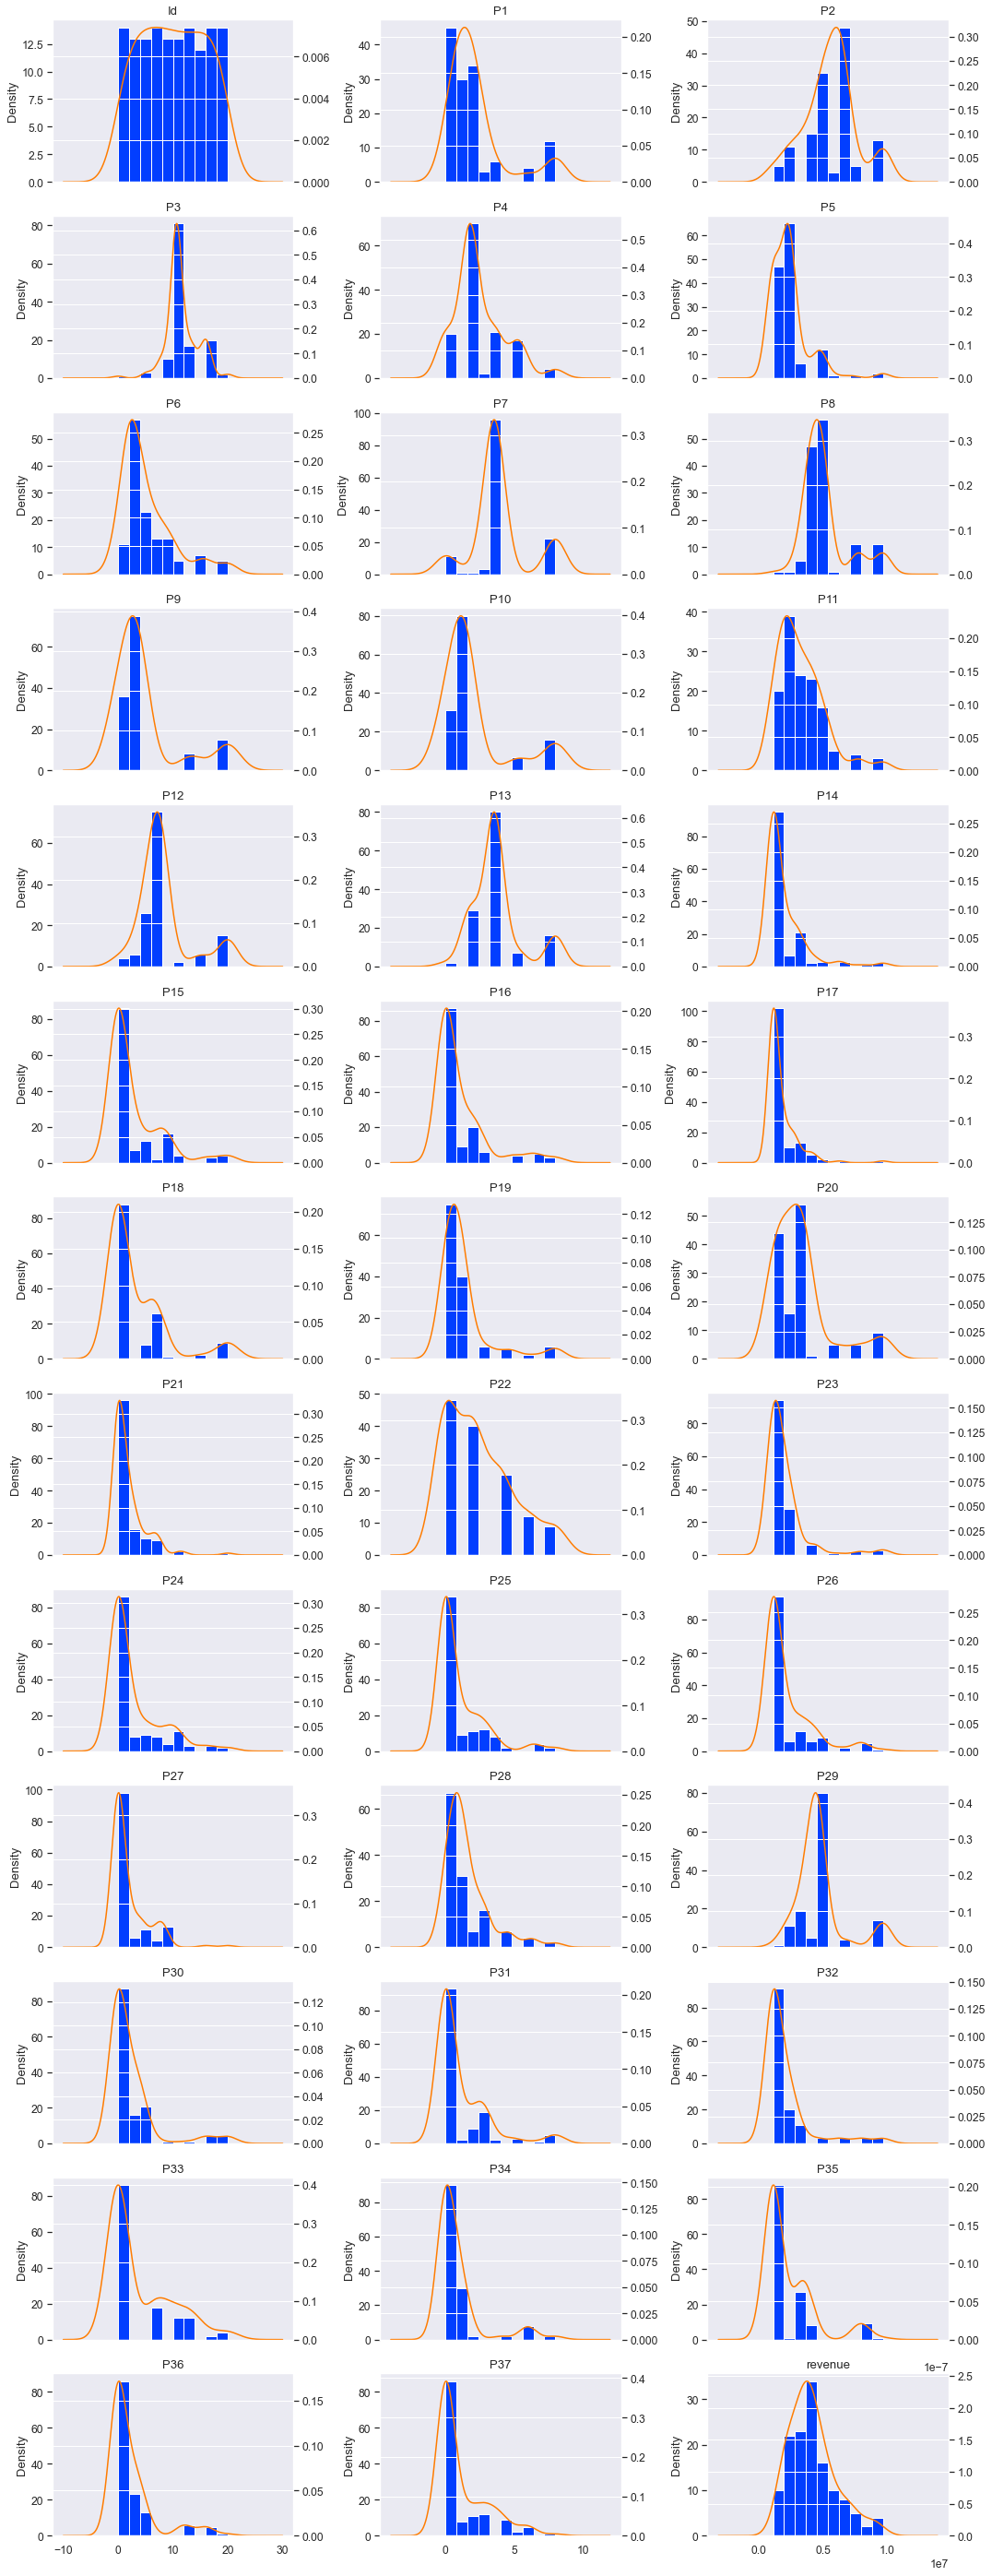

In [16]:
warnings.filterwarnings('ignore')

k = len(train[numerical_features].columns)
n = 3
m = (k - 1) // n + 1 
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(train[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)
    
    
fig.tight_layout()



Numerical features and revenue correlation:

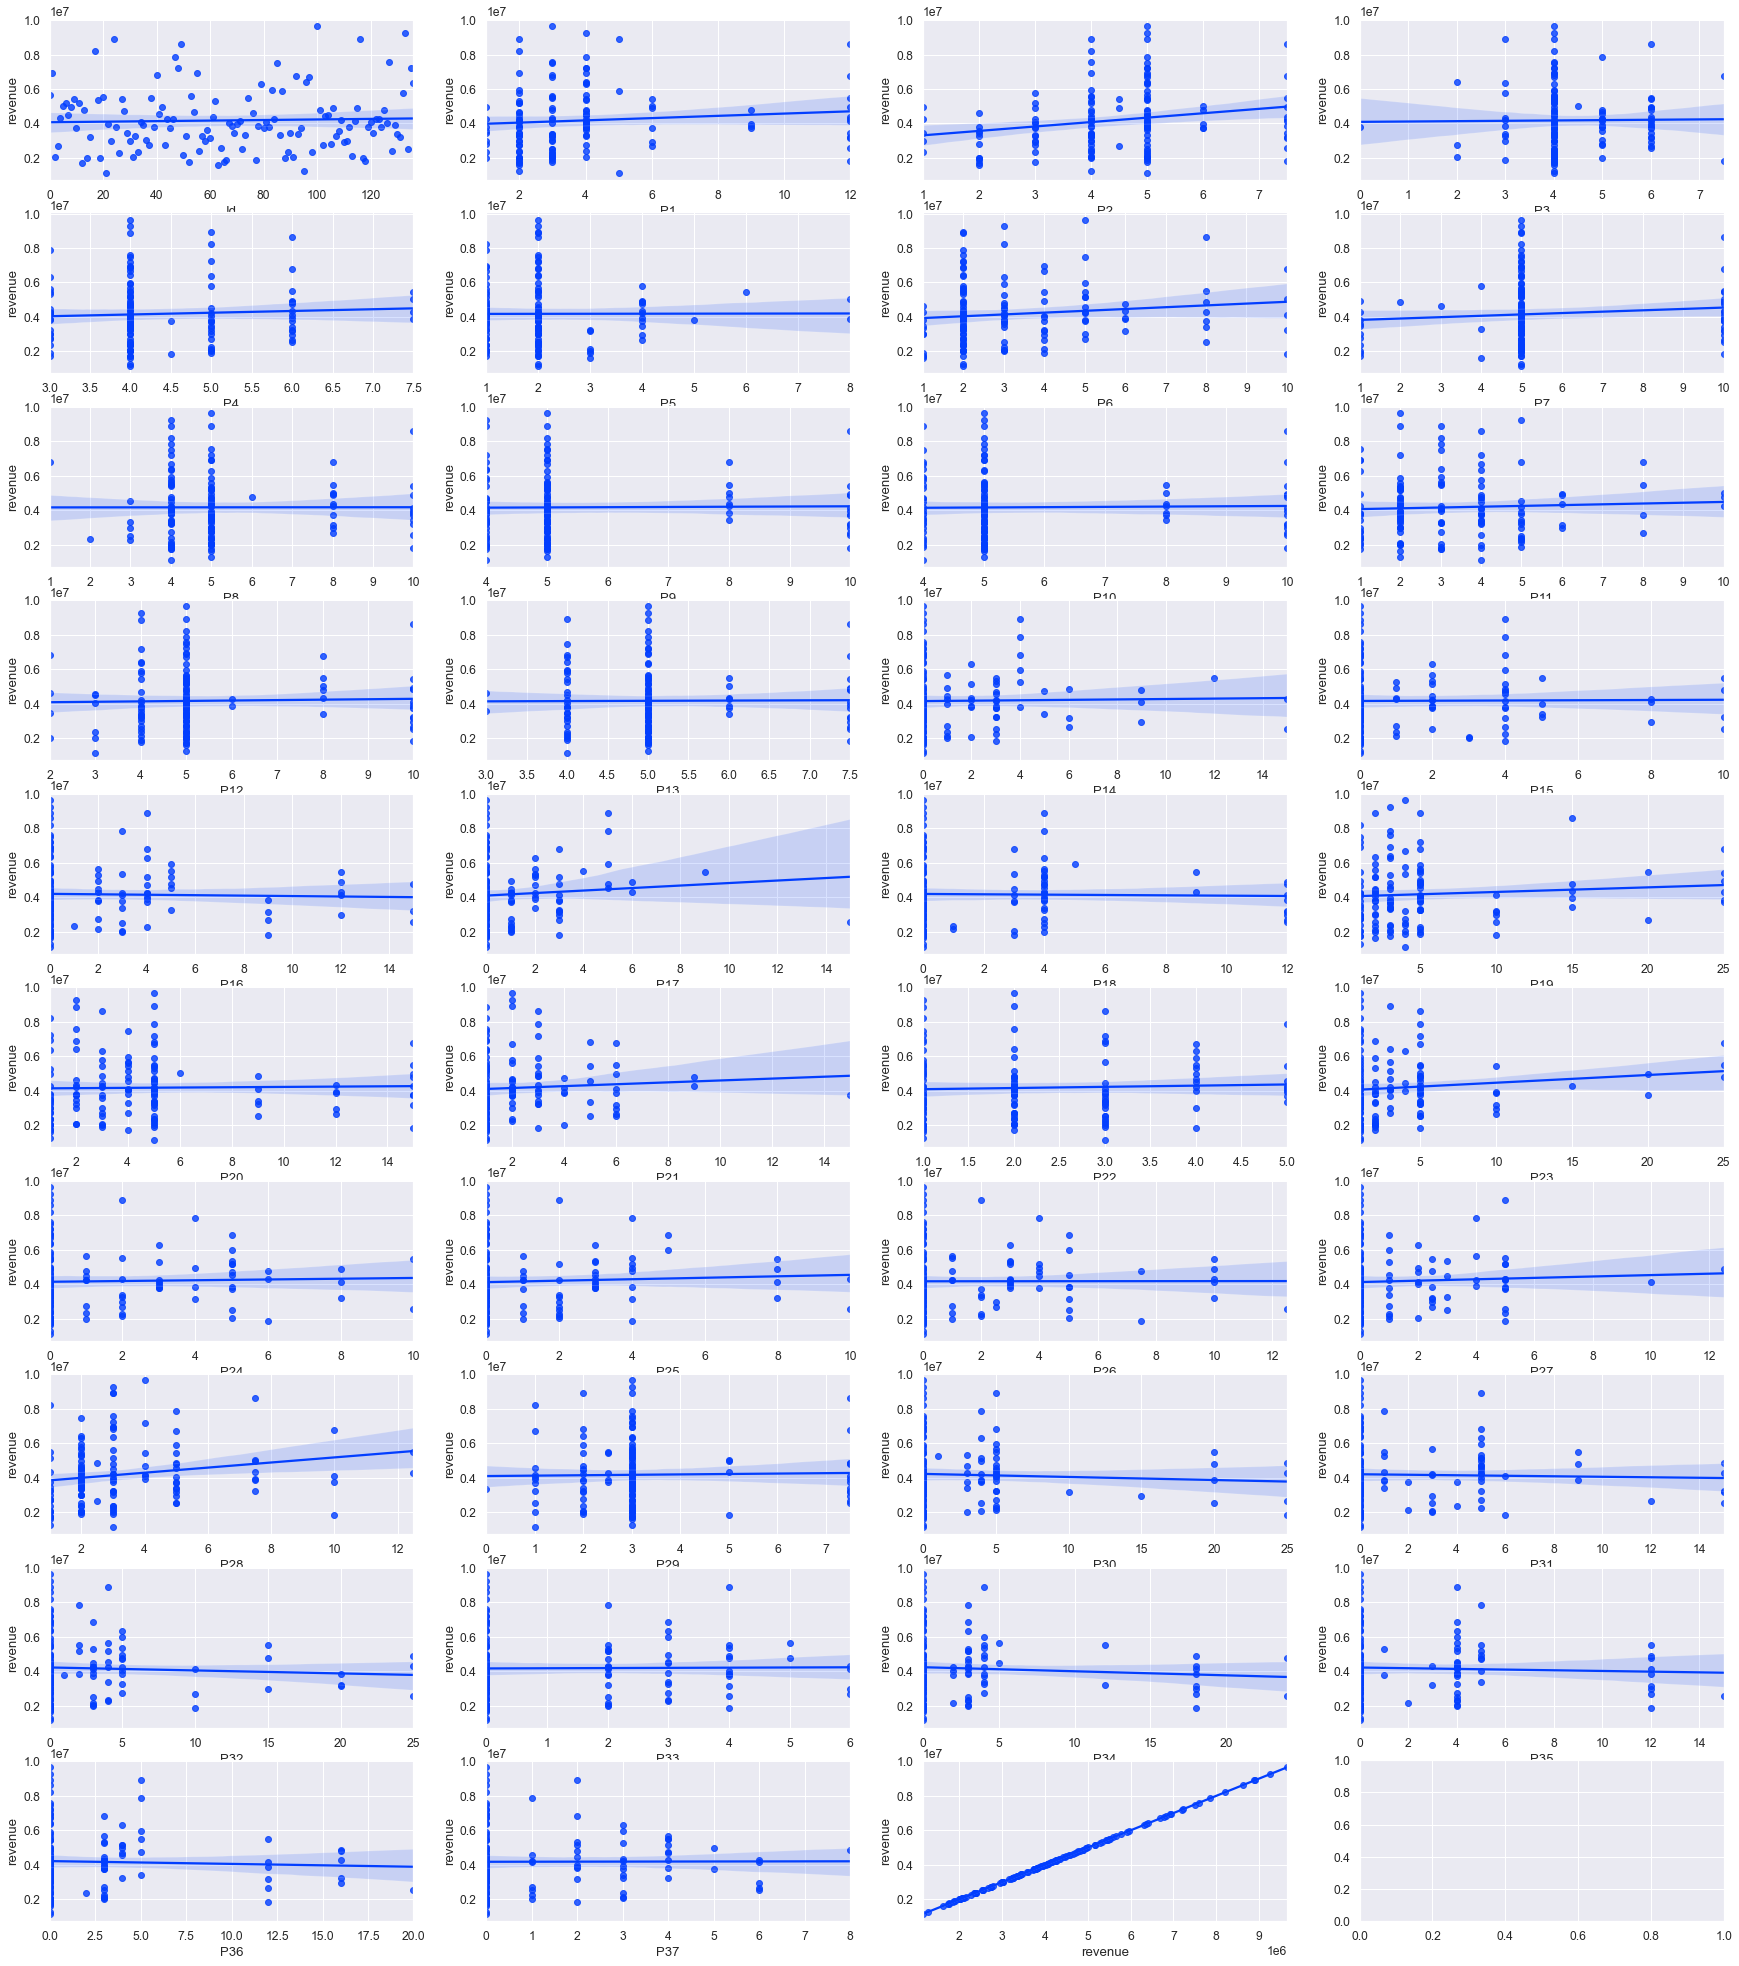

In [17]:
fig, ax = plt.subplots(10, 4, figsize=(30, 35))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=train[variable], y=train['revenue'], ax=subplot)

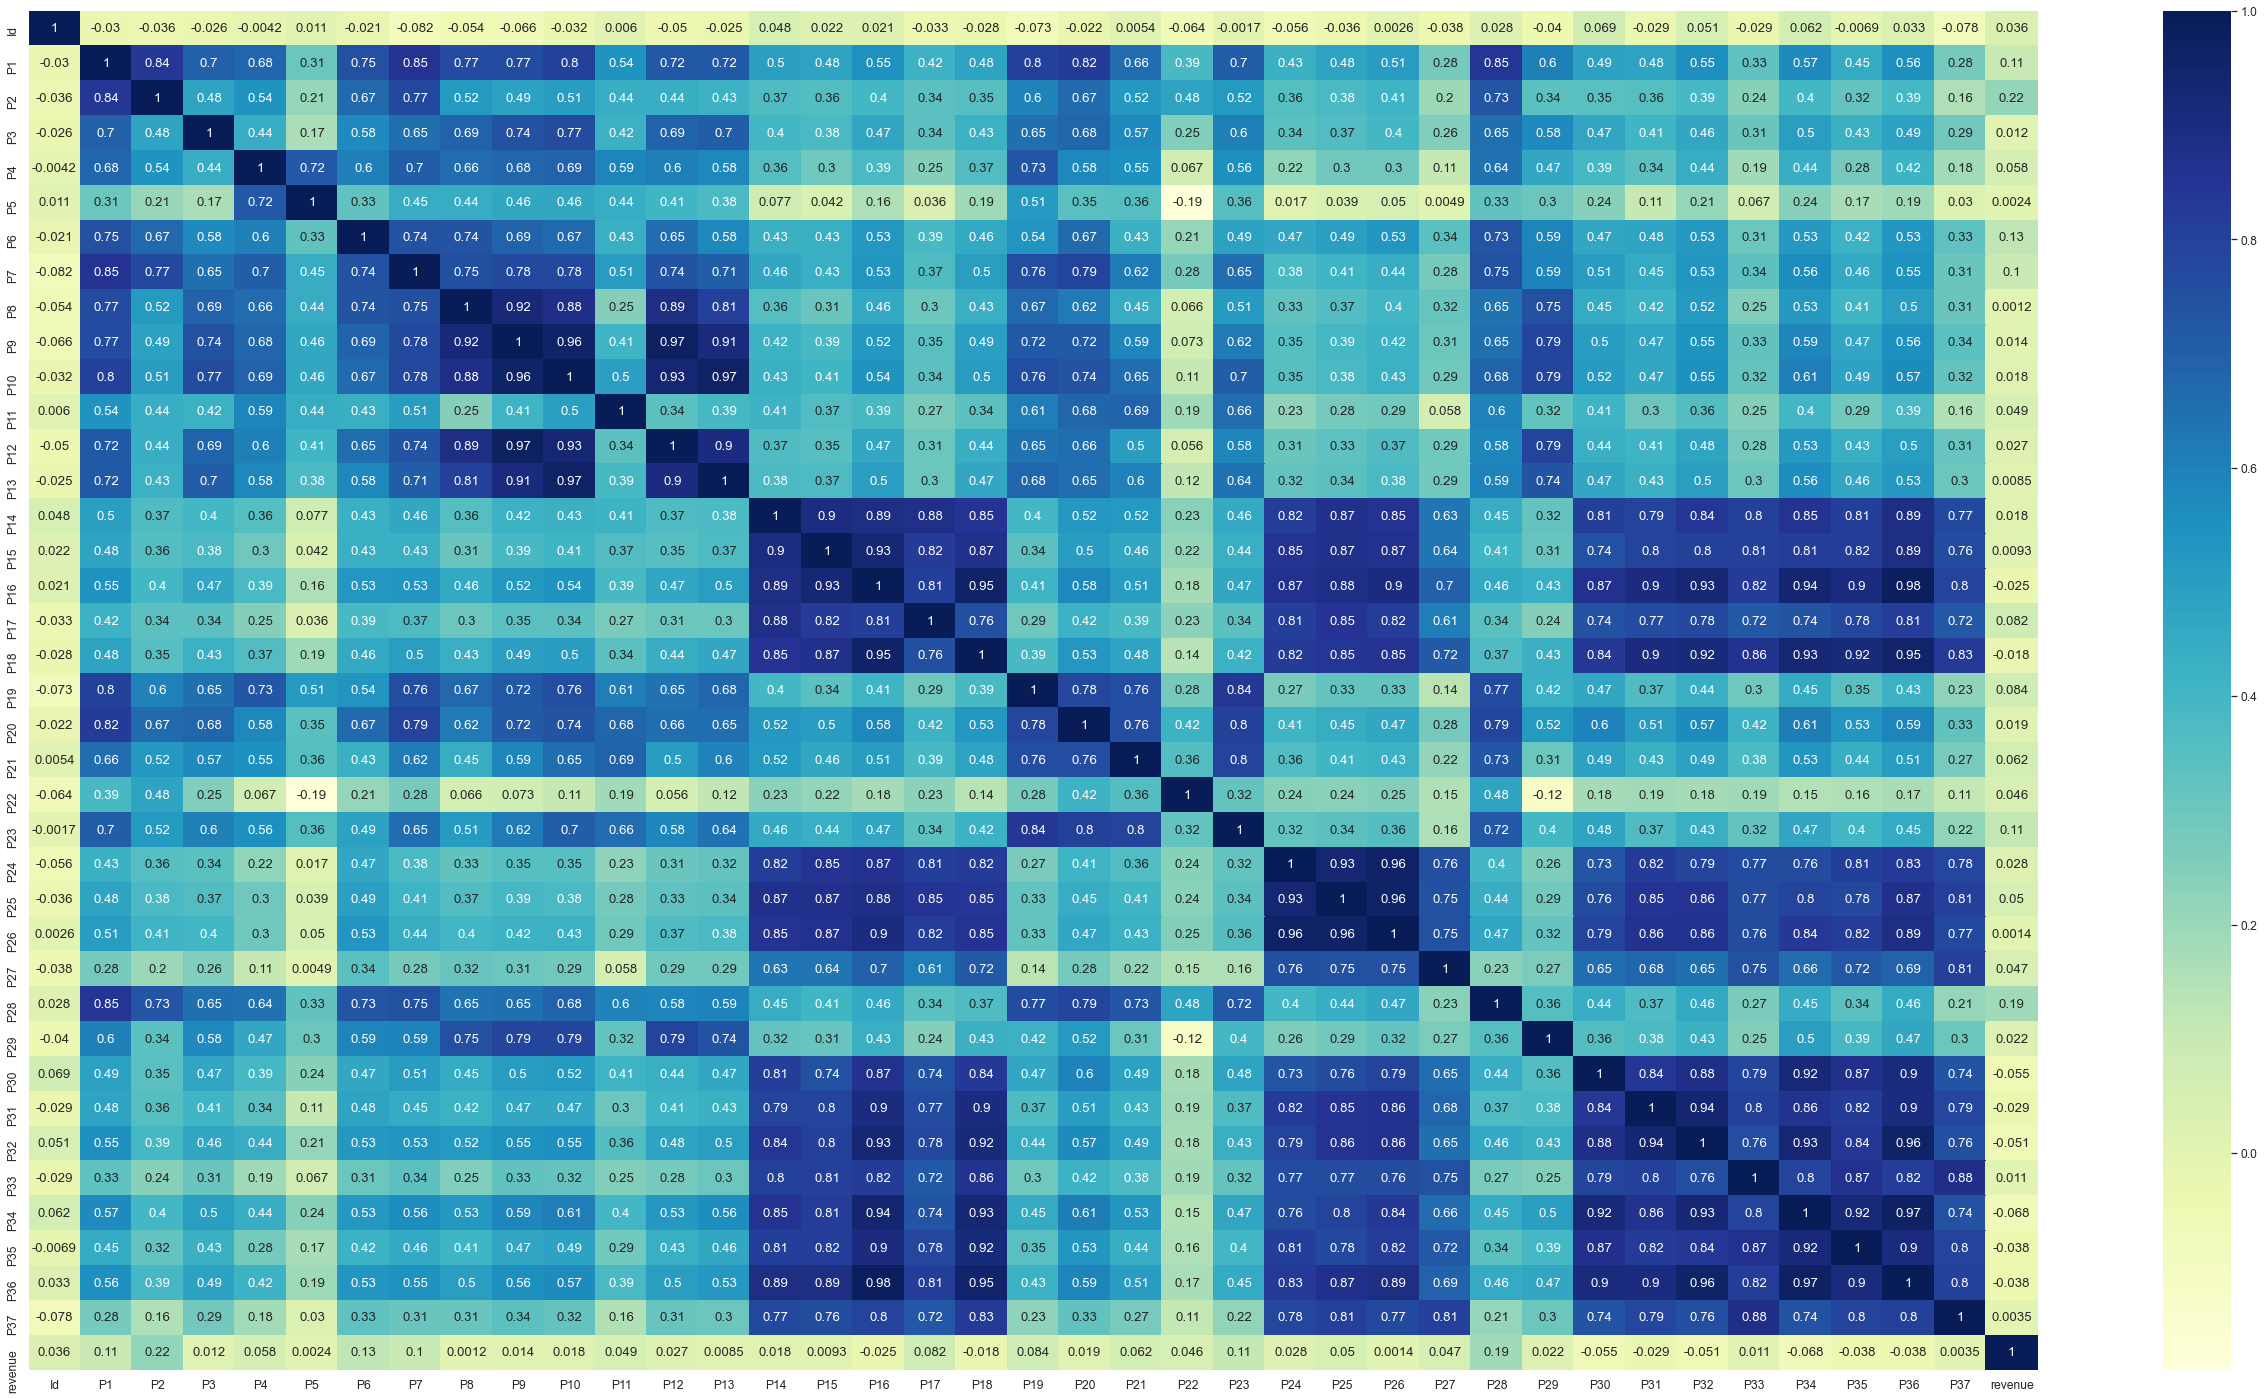

In [18]:
plt.figure(figsize=(45,25))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

Note: There's no evidence of having big deviation between the numerical features.

Correlations of features with target variable (revenue):

In [19]:
correlations = train.corr()
correlations['revenue']

Id         0.035886
P1         0.106975
P2         0.217491
P3         0.011755
P4         0.057928
P5         0.002373
P6         0.125315
P7         0.102491
P8         0.001171
P9         0.013561
P10        0.018277
P11        0.049328
P12        0.026608
P13        0.008513
P14        0.018282
P15        0.009322
P16       -0.025185
P17        0.081541
P18       -0.018292
P19        0.083804
P20        0.018973
P21        0.061999
P22        0.046387
P23        0.114357
P24        0.028426
P25        0.049852
P26        0.001369
P27        0.046918
P28        0.190908
P29        0.022115
P30       -0.055073
P31       -0.028761
P32       -0.050743
P33        0.010659
P34       -0.068246
P35       -0.038330
P36       -0.038126
P37        0.003478
revenue    1.000000
Name: revenue, dtype: float64

In [20]:
# Select more relevant features (where corr >= 0.1)
cor_target = abs(correlations['revenue'])

relevant_features = cor_target[cor_target >= 0.1]
relevant_features

P1         0.106975
P2         0.217491
P6         0.125315
P7         0.102491
P23        0.114357
P28        0.190908
revenue    1.000000
Name: revenue, dtype: float64

Select more relevant features (where corr >= 0.1)

In [21]:

cor_target = abs(correlations['revenue'])

relevant_features = cor_target[cor_target >= 0.1]
relevant_features

P1         0.106975
P2         0.217491
P6         0.125315
P7         0.102491
P23        0.114357
P28        0.190908
revenue    1.000000
Name: revenue, dtype: float64

Other features' analysis relative to total_revenue

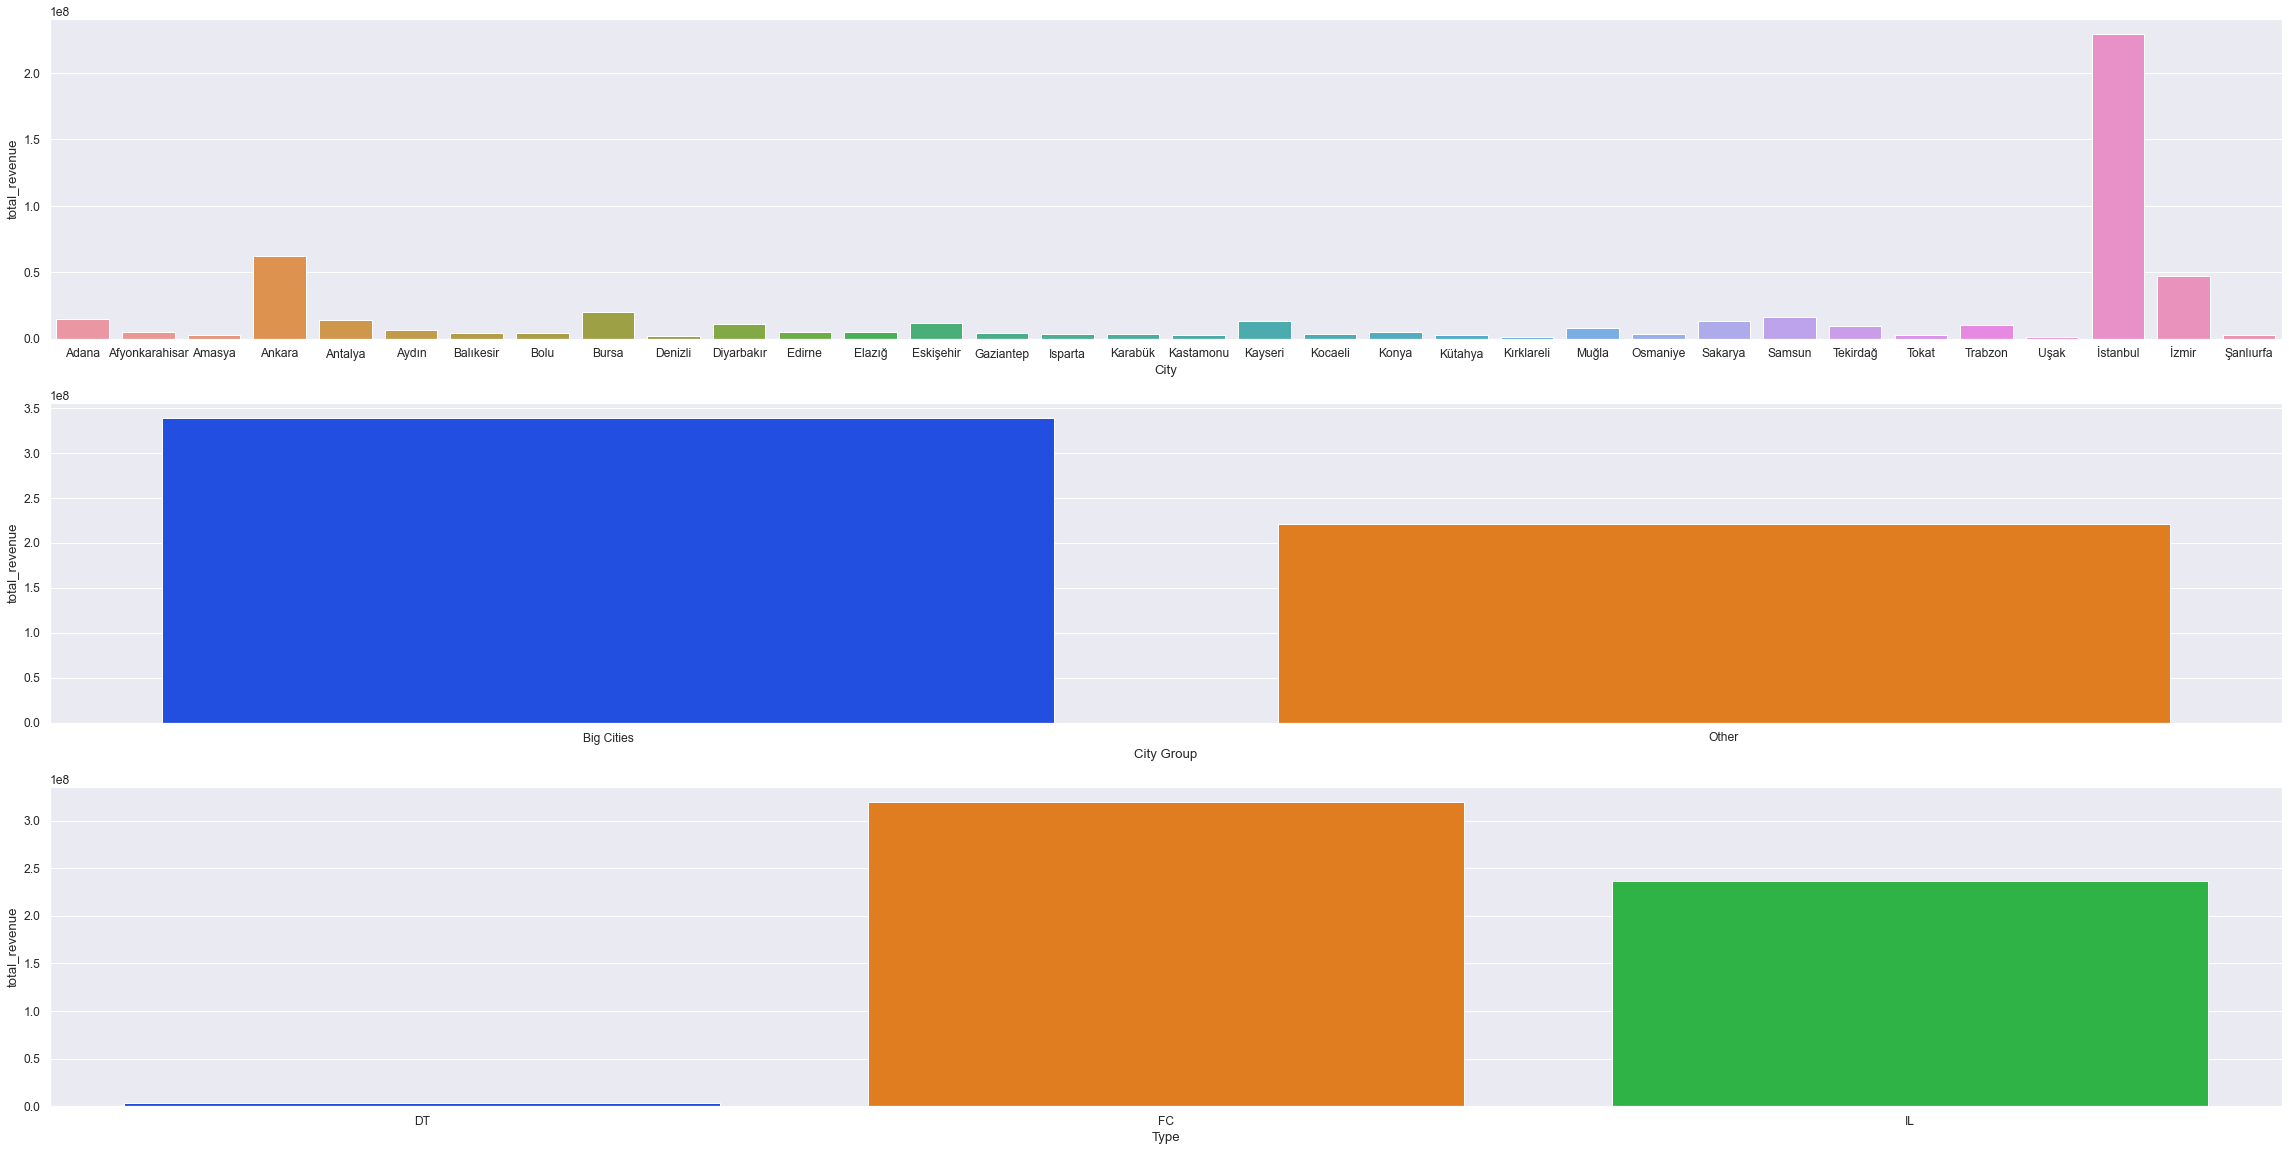

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(40, 20))
for variable, subplot in zip(categorical_features, ax.flatten()):
    df_2 = train[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_2.columns = [variable,'total_revenue']
    sns.barplot(x=variable, y='total_revenue', data=df_2 , ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

Basically, here are the city with the most successful revenue rates:
    Istanbul,
    Ankara,
    Izmir,
    Bursa,
    Samsun.
    These are the big cities.

Other features' analysis relative to revenue

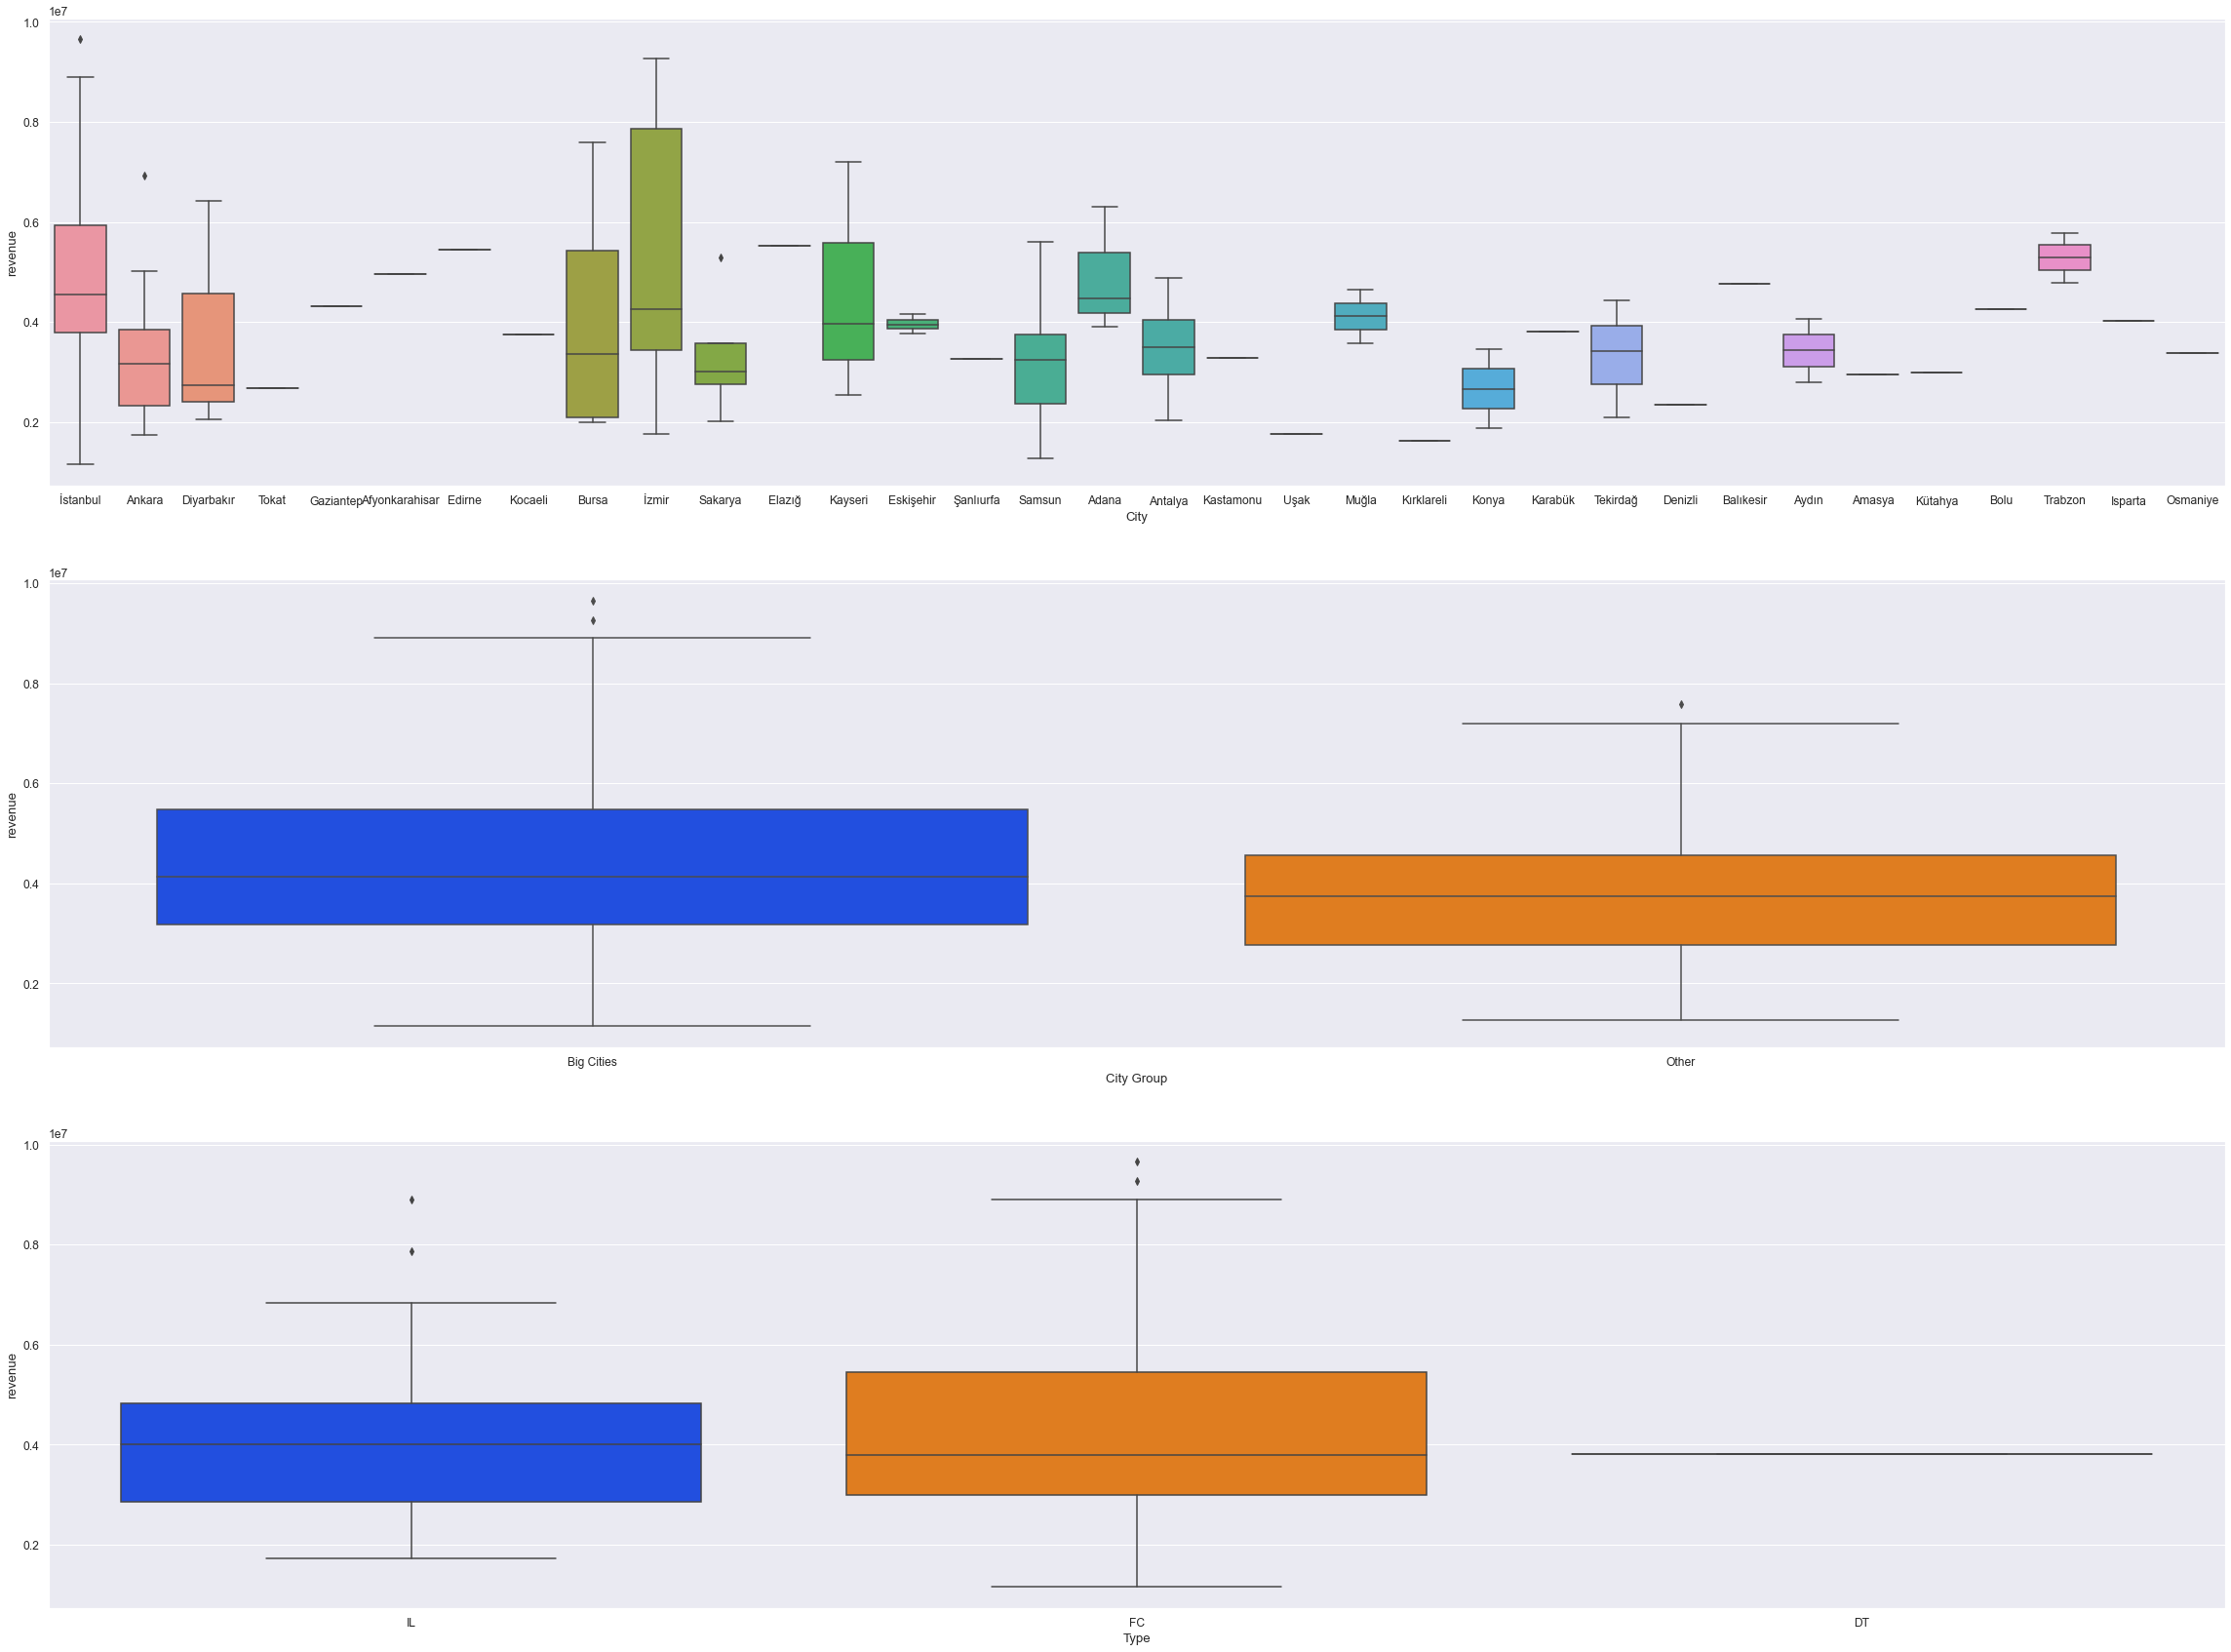

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(40, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='revenue', data=train, ax=subplot)

In conclusion, it is better to open up a restaurant in a big city, IL or FC type.

Inline restaurant: "the In-Line concept allows the chain to further customize the dining experience based on a specific location where traffic is high but limited space does not allow for the traditional stand-alone concept." (In case you guys don't know)


Food court:"an area in a shopping mall where fast-food outlets are located." 

P.S. Through this project I managed to contact my Friend from Izmir. All of the most successful restaurants in Izmir are IL type(Kelvin photo'n coffee, Yayaraw, La Puerta Izmir). 

# 2. Feature selection and augmentation

In [24]:
num_train = train.shape[0]
num_test = test.shape[0]
print(num_train, num_test)

# combine train and test data
data = pd.concat((train.loc[:, "Id" : "P37"], test.loc[:, "Id" : "P37"]), ignore_index=True)

134 100000


Let's approximate the test data to the training data.

Scheme describing the correlation between P-features and its average value for each city:

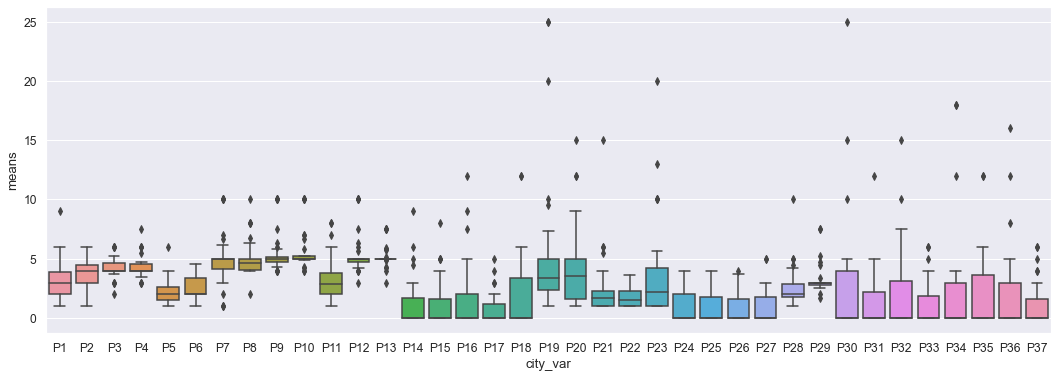

In [25]:
individ_cities = train.loc[:, "City"].unique()

means = []
for col in train.columns[5:42]:
    temp = []
    for city in individ_cities:
        temp.append(train.loc[train.City == city, col].mean())     
    means.append(temp)
    
city_pvars = pd.DataFrame(columns=["city_var", "means"])
for i in range(37):
    for j in range(len(individ_cities)):
        city_pvars.loc[i+37*j] = ["P"+str(i+1), means[i][j]]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
sns.boxplot(x="city_var", y="means", data=city_pvars)

Via sklearn we will predict the city cluster for a new individual city.

In [26]:
from sklearn import cluster
from sklearn import preprocessing
def adjust_cities(data, train, k):    
    relevant_pvars =  ["P1", "P2", "P11", "P19", "P20", "P23", "P30"]
    train = train.loc[:, relevant_pvars]      
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(train)    
    data['City Cluster'] = kmeans.predict(data.loc[:, relevant_pvars])
    del data["City"]    
    return data
def one_hot_ecoding(data,col,pref):   
    data = data.join(pd.get_dummies(data[col], prefix=pref))
    data = data.drop([col], axis=1)
    return data

In [27]:
# Convert unknown cities in test data to clusters based on known cities using KMeans
data = adjust_cities(data, train, 20)
data = one_hot_ecoding(data,'City Group',"CG")
data = one_hot_ecoding(data,'Type',"T")

In [28]:
data.dtypes

Id                        int64
Open Date        datetime64[ns]
P1                        int64
P2                      float64
P3                      float64
P4                      float64
P5                        int64
P6                        int64
P7                        int64
P8                        int64
P9                        int64
P10                       int64
P11                       int64
P12                       int64
P13                     float64
P14                       int64
P15                       int64
P16                       int64
P17                       int64
P18                       int64
P19                       int64
P20                       int64
P21                       int64
P22                       int64
P23                       int64
P24                       int64
P25                       int64
P26                     float64
P27                     float64
P28                     float64
P29                     float64
P30     

In [29]:
# Drop nonrelevant columns
data = data.drop(['Id', 'P3', 'P4', 'P5', 'P8', 'P9',
                  'P10', 'P11', 'P12', 'P13', 'P14',
                  'P15', 'P16', 'P17', 'P18', 'P19',
                  'P20', 'P21', 'P22', 'P24', 'P25',
                  'P26', 'P27', 'P29','P30', 'P31', 
                  'P32', 'P33', 'P34', 'P35', 'P36', 
                  'P37', 'T_MB'], axis=1)

In [30]:
import time
from datetime import datetime as dt

df = data.copy()

# Split the date column into three columns 
df['Open Date Year']  = df['Open Date'].dt.year
df['Open Date Month']  = df['Open Date'].dt.month
df['Open Date Day']  = df['Open Date'].dt.day    
 
# Drop Open Date column
df = df.drop(['Open Date'], axis=1)

In [31]:
#split into train and test data
train_processed = df[:num_train]
test_processed = df[num_train:]
train_processed["revenue"] = train["revenue"].values
train = train_processed
test = test_processed

print("Train :",train.shape)
print("Test:",test.shape)

Train : (134, 16)
Test: (100000, 15)


The data is normalized

# 3. Algorithm selection


### Custom Linear Regressor

In [32]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [33]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [34]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    return X_new, mean, std

In [35]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 15:].values

X_test = test

X_train_norm, mean, std = normalize(X_train)
X_train = prepare_X(X_train_norm)

theta = np.zeros([len(train.columns), 1])

In [36]:
X_train.shape, y_train.shape, X_test.shape, theta.shape

((134, 16), (134, 1), (100000, 15), (16, 1))

In [37]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [38]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = np.sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [39]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = np.dot(np.transpose(X), hypothesis(X, theta) - y) / m
    return d_theta

In [40]:
# iterations and learning rate
iterations = 500 
alpha = 0.01

In [41]:
def gradientdescent(X, y, theta, iterations, alpha):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    J_history.append(J)
    for i in range(iterations - 1):
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        J_history.append(J)
    return theta, J_history # calculate vector theta

In [42]:
# Compute and display theta
Theta, J_history = gradientdescent(X_train, y_train, theta, iterations, alpha)
Theta

array([[4153686.77993978],
       [  21965.1639114 ],
       [ -24561.75599239],
       [ -20909.08526976],
       [  21944.6294694 ],
       [   8550.52078818],
       [   9062.96718877],
       [   5657.9293243 ],
       [  -5657.9293243 ],
       [  -4530.93216377],
       [   6189.66783754],
       [  -5414.63083596],
       [ -18368.53697862],
       [  -4281.25988251],
       [   9484.45518635],
       [1760020.73903054]])

In [43]:
# Compute and display cost
J = cost_function(X_train, y_train, Theta)
J

1192947528.504656

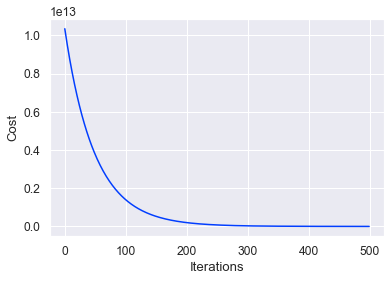

In [44]:
# Plot Iterations vs. Cost figure
fig_2, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iterations), J_history, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

plt.show()

#### Results evaluation

Implement on training set:

In [45]:
y_train_pred = hypothesis(X_train, Theta)
rel_diff = np.abs(np.divide(y_train - y_train_pred, y_train))* 100
print(' y_actual\ty_pred\t err(%)')
for i in range(134):
    print(y_train[i], y_train_pred[i].round(2), rel_diff[i].round(2))

 y_actual	y_pred	 err(%)
[5653753.] [5661012.51] [0.13]
[6923131.] [6904233.17] [0.27]
[2055379.] [1998547.29] [2.77]
[2675511.] [2597732.56] [2.91]
[4316715.] [4257341.52] [1.38]
[5017319.] [4926671.97] [1.81]
[5166635.] [5057049.75] [2.12]
[4491607.] [4449005.83] [0.95]
[4952497.] [4889888.84] [1.26]
[5444227.] [5359166.96] [1.56]
[3745135.] [3767430.01] [0.6]
[5161370.] [5091516.45] [1.35]
[1734634.] [1743095.44] [0.49]
[4807746.] [4772513.68] [0.73]
[1999097.] [1993958.71] [0.26]
[3218918.] [3157464.06] [1.91]
[8213524.] [8098219.35] [1.4]
[5337526.] [5292152.77] [0.85]
[2021934.] [2004463.04] [0.86]
[5525735.] [5459245.05] [1.2]
[1149870.] [1194607.15] [3.89]
[3956086.] [3931244.38] [0.63]
[2999068.] [2972388.75] [0.89]
[8904084.] [8808944.98] [1.07]
[3778621.] [3754918.14] [0.63]
[2267425.] [2284539.74] [0.75]
[5435276.] [5462874.33] [0.51]
[4705945.] [4750157.17] [0.94]
[3447890.] [3456426.53] [0.25]
[3008199.] [2954028.03] [1.8]
[2058644.] [2070792.18] [0.59]
[3261924.] [326037

Note: General error rate is small

In [46]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.9992577424193892

Revenue prediction

In [47]:
X_test_norm, mean, std = normalize(X_test)
X_test = prepare_X(X_test_norm)

y_test_pred = hypothesis(X_test, Theta)
y_test_pred

array([[5596913.87838708],
       [4789669.50655447],
       [7199036.20527451],
       ...,
       [6976380.12514023],
       [3754812.4015733 ],
       [2259318.43261907]])

### Sklearn-package

In [48]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_train)
rel_diff = np.abs(np.divide(y_train - pred, y_train))* 100
print(' y_actual\ty_pred\t err(%)')
for i in range(134):
    print(y_train[i], pred[i].round(2), rel_diff[i].round(2))

 y_actual	y_pred	 err(%)
[5653753.] [5653753.] [0.]
[6923131.] [6923131.] [0.]
[2055379.] [2055379.] [0.]
[2675511.] [2675511.] [0.]
[4316715.] [4316715.] [0.]
[5017319.] [5017319.] [0.]
[5166635.] [5166635.] [0.]
[4491607.] [4491607.] [0.]
[4952497.] [4952497.] [0.]
[5444227.] [5444227.] [0.]
[3745135.] [3745135.] [0.]
[5161370.] [5161370.] [0.]
[1734634.] [1734634.] [0.]
[4807746.] [4807746.] [0.]
[1999097.] [1999097.] [0.]
[3218918.] [3218918.] [0.]
[8213524.] [8213524.] [0.]
[5337526.] [5337526.] [0.]
[2021934.] [2021934.] [0.]
[5525735.] [5525735.] [0.]
[1149870.] [1149870.] [0.]
[3956086.] [3956086.] [0.]
[2999068.] [2999068.] [0.]
[8904084.] [8904084.] [0.]
[3778621.] [3778621.] [0.]
[2267425.] [2267425.] [0.]
[5435276.] [5435276.] [0.]
[4705945.] [4705945.] [0.]
[3447890.] [3447890.] [0.]
[3008199.] [3008199.] [0.]
[2058644.] [2058644.] [0.]
[3261924.] [3261924.] [0.]
[2371202.] [2371202.] [0.]
[4100886.] [4100886.] [0.]
[3903884.] [3903884.] [0.]
[3028267.] [3028267.] [0.]
[27

In [49]:
r2_score(y_train, pred)

1.0

Successful reflection!

In [50]:
# Root Mean Squared Error
rmse = np.sqrt(((y_train_pred - y_train) ** 2).mean())

# Mean Squared Error
mse = ((y_train_pred - y_train) ** 2).mean()

# Mean Absolute Error
mae = (abs(y_train_pred - y_train)).mean()

print('RMSE: ', rmse)
print('MSE: ', mse)
print('MAE: ', mae)

RMSE:  48845.624747865724
MSE:  2385895057.009312
MAE:  38836.40537902938
